<a href="https://colab.research.google.com/github/Ken-G100/-file_handling_basic.py/blob/main/Tesla_Stock_Aanlysis_Kenny.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Tesla** Stock Price Analysis
This notebook is designed to explore the history of Tesla (TSLA) stock price data, to understand
price trends and the relationship between trading volume and price volatility.

## Research Questions

1. How has Tesla’s closing stock price changed over time?
2. Is there a relationship between daily trading volume and price volatility?

In [41]:
import pandas as pd
import matplotlib.pyplot as plt


In [42]:
df = pd.read_csv("TSLA_Stock.csv")
df.head()



,Unnamed: 0,Date,Close,High,Low,Open,Volume
0,2701,2021-03-23,220.720001,225.933334,219.169998,225.256668,91475700
1,2702,2021-03-24,210.089996,222.673340,210.036667,222.636673,101385600
2,2703,2021-03-25,213.463333,215.166672,203.166672,204.333328,117674700
3,2704,2021-03-26,206.236664,214.606674,199.963333,213.956665,101558400
4,2705,2021-03-29,203.763336,205.493332,198.673340,205.213333,85911000


## Dataset Overview

Before any analysis, I had to figure out the structure of the dataset, including columns
and data types.

In [43]:
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254 entries, 0 to 253
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  254 non-null    int64  
 1   Date        254 non-null    object 
 2   Close       254 non-null    float64
 3   High        254 non-null    float64
 4   Low         254 non-null    float64
 5   Open        254 non-null    float64
 6   Volume      254 non-null    int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 14.0+ KB


# Data Cleaning
The dataset contains an unnecessary index column, which will be removed.

In [44]:
df = df.drop(columns=["Unnamed: 0"])

# 1. How has Tesla’s closing stock price changed over time?


## Analysis of Closing Price Over Time

In [45]:
df["Date"] = pd.to_datetime(df["Date"])


In [46]:
df["Year"] = df["Date"].dt.year


In [47]:
df["Year"].unique()


array([2021, 2022], dtype=int32)

In [48]:
df.dtypes


,0
Date,datetime64[ns]
Close,float64
High,float64
Low,float64
Open,float64
Volume,int64
Year,int32


In [49]:
df[["Date", "Year"]].head()


,Date,Year
0,2021-03-23,2021
1,2021-03-24,2021
2,2021-03-25,2021
3,2021-03-26,2021
4,2021-03-29,2021


In [57]:
yearly_close.index


Index([2021, 2022], dtype='int32', name='Year')

In [51]:
yearly_close = df.groupby("Year")["Close"].mean()


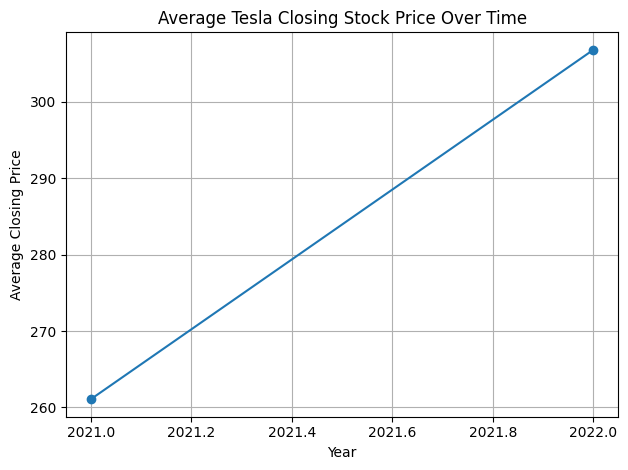

In [52]:
yearly_close.plot(marker='o')
plt.title("Average Tesla Closing Stock Price Over Time")
plt.xlabel("Year")
plt.ylabel("Average Closing Price")
plt.tight_layout()
plt.grid()
plt.show()


# 2. Is there a relationship between trading volume and price volatility?

## Volume and Price Volatility

Daily price volatility is calculated as the difference between
the high and low prices.

In [53]:
df.columns


Index(['Date', 'Close', 'High', 'Low', 'Open', 'Volume', 'Year'], dtype='object')

In [54]:
df["Volatility"] = df["High"] - df["Low"]


In [55]:
df.head()


,Date,Close,High,Low,Open,Volume,Year,Volatility
0,2021-03-23,220.720001,225.933334,219.169998,225.256668,91475700,2021,6.763336
1,2021-03-24,210.089996,222.673340,210.036667,222.636673,101385600,2021,12.636673
2,2021-03-25,213.463333,215.166672,203.166672,204.333328,117674700,2021,12.000000
3,2021-03-26,206.236664,214.606674,199.963333,213.956665,101558400,2021,14.643341
4,2021-03-29,203.763336,205.493332,198.673340,205.213333,85911000,2021,6.819992


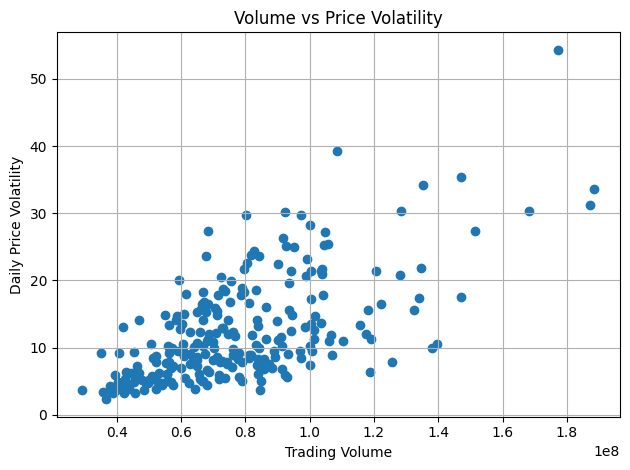

In [56]:
plt.figure()
plt.scatter(df["Volume"], df["Volatility"])
plt.xlabel("Trading Volume")
plt.ylabel("Daily Price Volatility")
plt.title("Volume vs Price Volatility")
plt.tight_layout()
plt.grid()
plt.show()
